## 🧪 Section A: Line and Scatter Plots


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

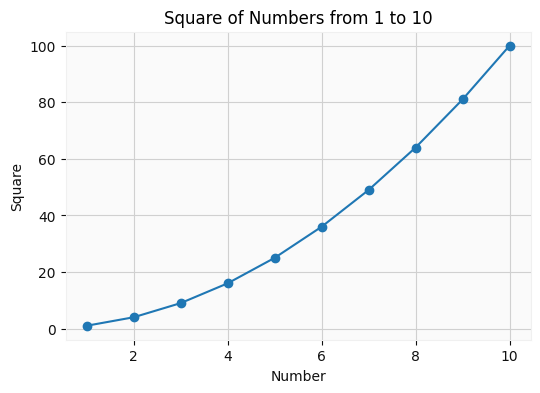

In [12]:


# 1. Line Plot: Squares of values from 1 to 10
x = np.arange(1, 11)
y = x ** 2

plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o')
plt.title('Square of Numbers from 1 to 10')
plt.xlabel('Number')
plt.ylabel('Square')
plt.grid(True)
plt.show()



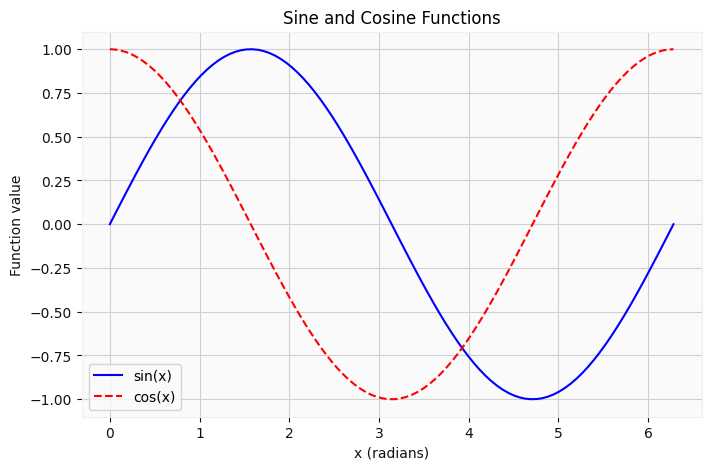

In [13]:

# 2. Multiple Line Plot: sin(x) and cos(x)
x = np.linspace(0, 2 * np.pi, 100)
sin_y = np.sin(x)
cos_y = np.cos(x)

plt.figure(figsize=(8, 5))
plt.plot(x, sin_y, label='sin(x)', color='blue', linestyle='-')
plt.plot(x, cos_y, label='cos(x)', color='red', linestyle='--')
plt.title('Sine and Cosine Functions')
plt.xlabel('x (radians)')
plt.ylabel('Function value')
plt.legend()
plt.grid(True)
plt.show()


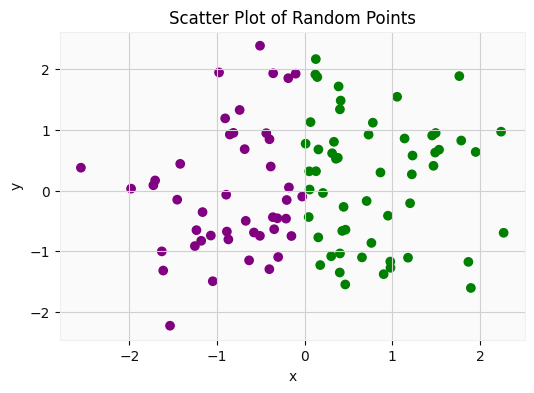

In [14]:

# 3. Scatter Plot with Random Data
np.random.seed(0)  # For reproducibility
x = np.random.randn(100)
y = np.random.randn(100)

colors = ['green' if val > 0 else 'purple' for val in x]

plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=colors)
plt.title('Scatter Plot of Random Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

##  Section B: Bar and Pie Charts
Bar Chart – Province Populations
- Use dummy data for the population of five provinces in Nepal. g

- Create a bar chart.
- Label each bar with the province name and set axis titles.
- Use a unique color for each bar.

In [15]:
# Dummy data
provinces = ['Province 1', 'Madhesh', 'Bagmati', 'Gandaki', 'Lumbini']
populations = [5.2, 6.1, 7.8, 3.5, 6.9]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

Text(0, 0.5, '[5.2, 6.1, 7.8, 3.5, 6.9]')

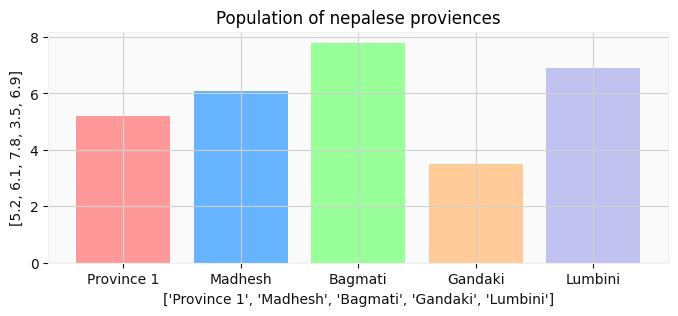

In [16]:
plt.figure(figsize=(8, 3))
bars = plt.bar(provinces, populations, color=colors)
plt.title("Population of nepalese proviences")
plt.xlabel(provinces)
plt.ylabel(populations)




### Pie Chart – Province Populations
Using the same data as above:

Create a pie chart.
- Label each slice with the province name and percentage.
- Explode the largest slice for emphasis.

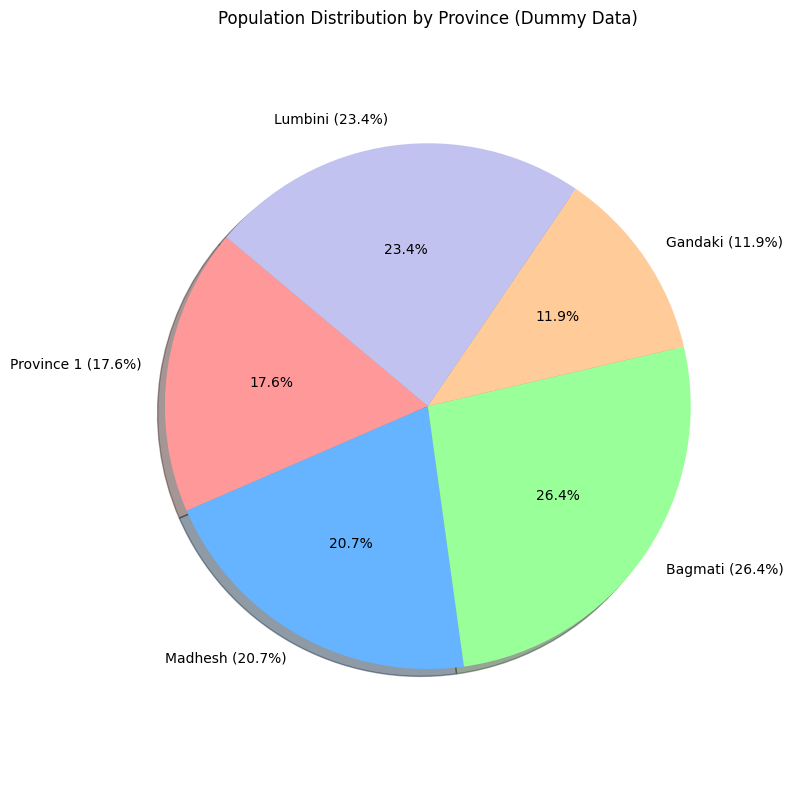

In [17]:


# Pie chart
# explode = [0, 0, 0.1, 0, 0]  # Explode the largest slice: Bagmati
total = sum(populations)
percentages = [p / total * 100 for p in populations]

plt.figure(figsize=(8, 8))
plt.pie(populations, labels=[f'{prov} ({p:.1f}%)' for prov, p in zip(provinces, percentages)],
        colors=colors,  autopct='%.1f%%', startangle=140, shadow=True)

plt.title('Population Distribution by Province (Dummy Data)')
plt.axis('equal')  # Make it a circle
plt.tight_layout()
plt.show()


## 📈 Section C: Time Series Plotting

6. **Temperature Time Series**
   - Create a `pandas` DataFrame with a `Date` column (30 days) and random temperature values.
   - Plot the temperature as a line chart.
   - Format the x-axis to show dates properly.

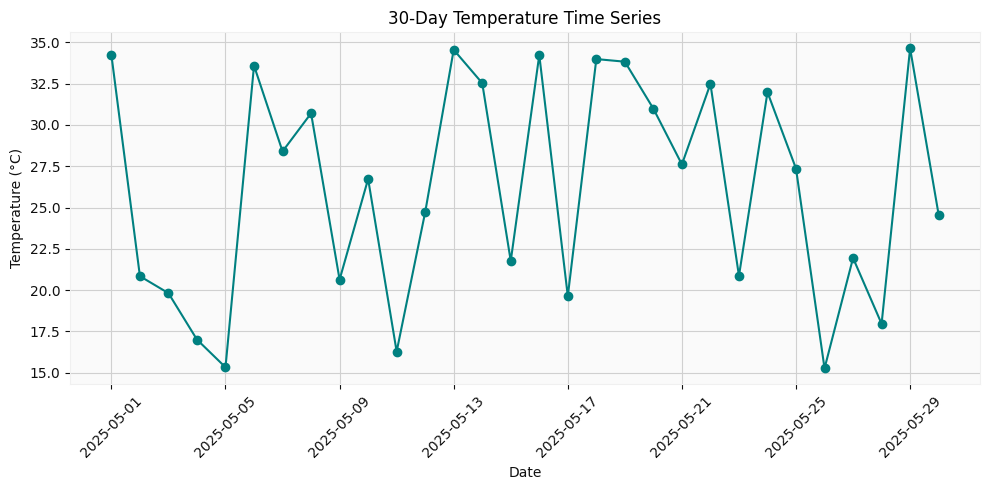

In [18]:

# 1. Create a date range for 30 days
date_range = pd.date_range(start="2025-05-01", periods=30, freq='D')

# 2. Generate random temperature data (e.g., between 15°C and 35°C)
temperature = np.random.uniform(low=15, high=35, size=30)

# 3. Create a DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperature
})

# 4. Plot the temperature time series
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], marker='o', linestyle='-', color='teal')
plt.title("30-Day Temperature Time Series")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

# 5. Format the x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



## 🧭 Section D: Candlestick Chart

7. **Candlestick Chart with `mplfinance`**
   - Create a DataFrame with columns: `Date`, `Open`, `High`, `Low`, `Close`, and optionally `Volume`.
   - Plot a candlestick chart using `mplfinance`.
   - Customize the title and figure size.

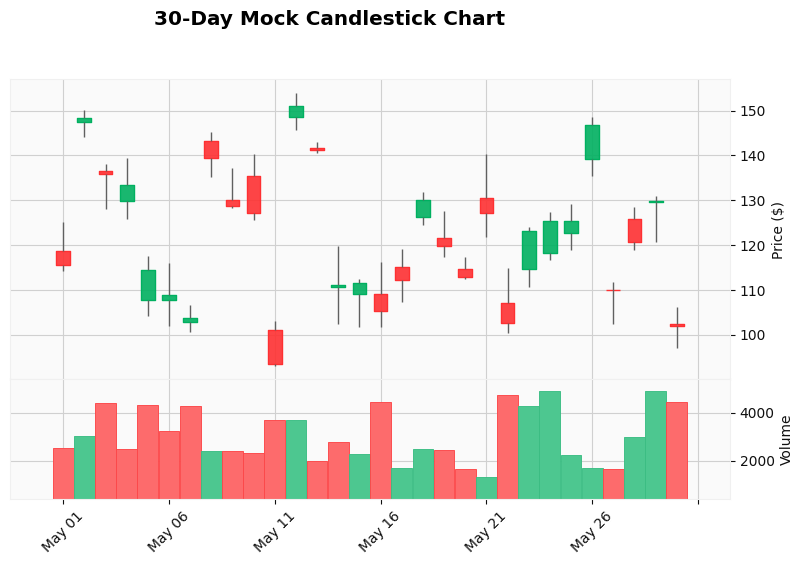

In [19]:
import mplfinance as mpf

# 1. Generate a date range
date_range = pd.date_range(start="2025-05-01", periods=30, freq='D')

# 2. Generate mock stock data
np.random.seed(42)  # For reproducibility
open_prices = np.random.uniform(100, 150, size=30)
high_prices = open_prices + np.random.uniform(1, 10, size=30)
low_prices = open_prices - np.random.uniform(1, 10, size=30)
close_prices = np.random.uniform(low_prices, high_prices)
volume = np.random.randint(1000, 5000, size=30)

# 3. Create the DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Volume': volume
})
df.set_index('Date', inplace=True)  # Required by mplfinance

# 4. Plot candlestick chart
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    title='30-Day Mock Candlestick Chart',
    ylabel='Price ($)',
    volume=True,
    figsize=(10, 6)
)


## 🎛 Section E: Interactivity

8. **Interactive Function Plotter**
   - Use `ipywidgets` to let a user choose:
     - Checkbox to show `sin`, `cos`, `tan` curves
     - A color
     - Number of points (e.g., 50, 100, 200)
   - Plot the selected function interactively with the chosen parameters.

In [20]:

import ipywidgets as widgets
from ipywidgets import interact

# Interactive plotting function
def plot_trig(show_sin, show_cos, show_tan, color, points):
    x = np.linspace(0, 2 * np.pi, points)
    
    plt.figure(figsize=(10, 5))
    
    if show_sin:
        plt.plot(x, np.sin(x), label='sin(x)', color=color)
    if show_cos:
        plt.plot(x, np.cos(x), label='cos(x)', linestyle='--', color=color)
    if show_tan:
        y = np.tan(x)
        y[np.abs(y) > 10] = np.nan  # avoid large jumps in tan
        plt.plot(x, y, label='tan(x)', linestyle=':', color=color)
    
    plt.ylim(-2, 2)
    plt.title("Interactive Trig Function Plotter")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Widgets
interact(
    plot_trig,
    show_sin=widgets.Checkbox(value=True, description='sin(x)'),
    show_cos=widgets.Checkbox(value=False, description='cos(x)'),
    show_tan=widgets.Checkbox(value=False, description='tan(x)'),
    color=widgets.Dropdown(options=['blue', 'green', 'red', 'purple'], value='blue'),
    points=widgets.IntSlider(min=50, max=500, step=50, value=100)
)


interactive(children=(Checkbox(value=True, description='sin(x)'), Checkbox(value=False, description='cos(x)'),…

<function __main__.plot_trig(show_sin, show_cos, show_tan, color, points)>